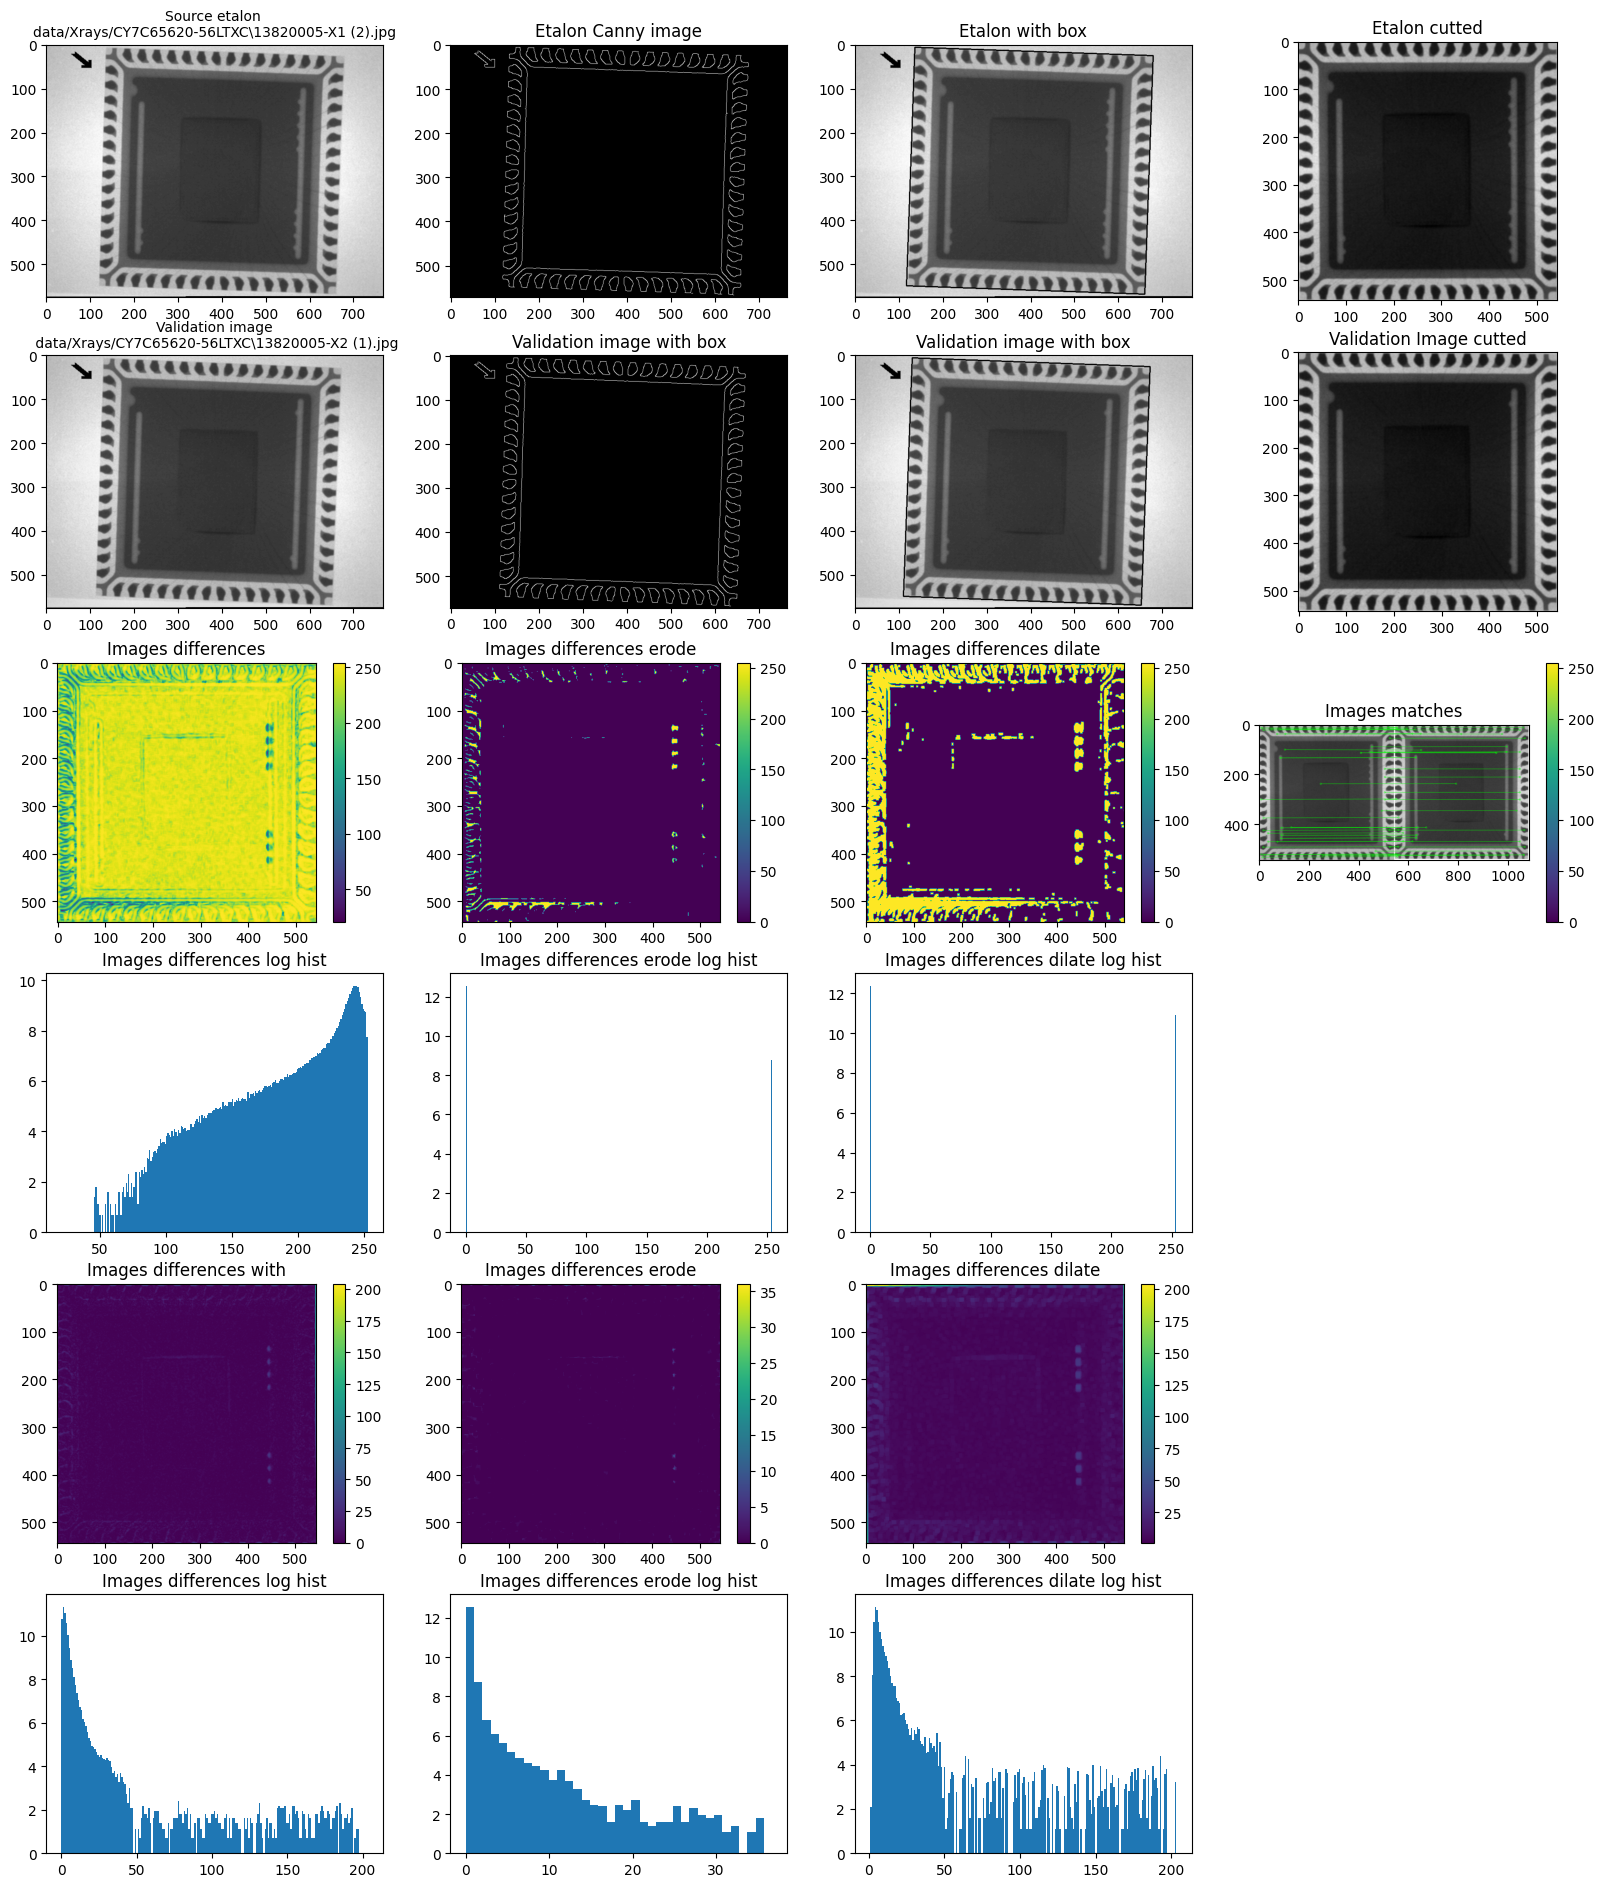

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.cluster import DBSCAN
from collections import Counter
from scipy.spatial import distance as dist
import glob
from skimage.metrics import structural_similarity as compare_ssim
from process import *
import imutils


def validate(etalon_path, img_path, savefig_path):
    # global bins, counts
    etalon_img = cv2.imdecode(np.fromfile(etalon_path, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    test_img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    ans1 = get_window(etalon_img)
    ans2 = get_window(test_img)
    try:
        ans3 = update_image_by_etalon(ans1['img_cutted'], ans2['img_cutted'])
    except:
        
        pass
    ans4 = find_differences2(cv2.resize(ans1['img_cutted'], ans2['img_cutted'].shape[::-1]), ans2['img_cutted'])
    ans5 = find_differences1(ans1['img_cutted'], ans3['img_cutted'])
    ans6 = find_differences2(ans1['img_cutted'], ans3['img_cutted'])

    rows = 20
    columns = 4
    fig = plt.figure(figsize=(5*columns, rows*4))
    fig.add_subplot(rows, columns, 1)
    plt.imshow(etalon_img, 'gray')
    plt.title(f'Source etalon \n{etalon_path}', fontsize=10)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(ans1['img_canny'], 'gray')
    plt.title('Etalon Canny image')
    fig.add_subplot(rows, columns, 3)
    plt.imshow(ans1['img_box'], 'gray')
    plt.title('Etalon with box')
    fig.add_subplot(rows, columns, 4)
    plt.imshow(ans1['img_cutted'], 'gray')
    plt.title('Etalon cutted')

    fig.add_subplot(rows, columns, 5)
    plt.imshow(test_img, 'gray')
    plt.title(f'Validation image\n {img_path}', fontsize=10)
    fig.add_subplot(rows, columns, 6)
    plt.imshow(ans2['img_canny'], 'gray')
    plt.title('Validation image with box')
    fig.add_subplot(rows, columns, 7)
    plt.imshow(ans2['img_box'], 'gray')
    plt.title('Validation image with box')
    fig.add_subplot(rows, columns, 8)
    plt.imshow(ans2['img_cutted'], 'gray')
    plt.title('Validation Image cutted')

    fig.add_subplot(rows, columns, 9)
    plt.imshow(ans4['img_diff'])
    plt.title('Images differences')
    plt.colorbar()
    fig.add_subplot(rows, columns, 10)
    plt.imshow(ans4['img_diff_erode'])
    plt.title('Images differences erode')
    plt.colorbar()
    fig.add_subplot(rows, columns, 11)
    plt.imshow(ans4['img_diff_dilate'])
    plt.title('Images differences dilate')
    plt.colorbar()
    fig.add_subplot(rows, columns, 12)
    plt.imshow(ans3['img_matches'])
    plt.title('Images matches')
    plt.colorbar()

    with np.errstate(divide = 'ignore'):
        ax = fig.add_subplot(rows, columns, 13)
        counts, bins, _ = plt.hist(ans4['img_diff'].reshape(-1), bins=256, range=(0,255))
        ax.clear()
        counts = np.log(counts)
        plt.hist(bins[:-1], bins = counts.shape[0], weights=counts);
        plt.title('Images differences log hist')

        ax = fig.add_subplot(rows, columns, 14)
        counts, bins, _ = plt.hist(ans4['img_diff_erode'].reshape(-1), bins=256, range=(0,255))
        ax.clear()
        counts = np.log(counts)
        plt.hist(bins[:-1], bins = counts.shape[0], weights=counts);
        plt.title('Images differences erode log hist')

        ax = fig.add_subplot(rows, columns, 15)
        counts, bins, _ = plt.hist(ans4['img_diff_dilate'].reshape(-1), bins=256, range=(0,255))
        ax.clear()
        counts = np.log(counts)
        plt.hist(bins[:-1], bins = counts.shape[0], weights=counts);
        plt.title('Images differences dilate log hist')
    # fig.add_subplot(rows, columns, 14)
    # plt.imshow(ans4['diff_erode'])
    # plt.title('Images differences erode')
    # fig.add_subplot(rows, columns, 15)
    # plt.imshow(ans4['diff_dilate'])
    # plt.title('Images differences dilate')

    fig.add_subplot(rows, columns, 17)
    plt.imshow(ans5['img_diff'])
    plt.colorbar()
    plt.title('Images differences with')
    fig.add_subplot(rows, columns, 18)
    plt.imshow(ans5['img_diff_erode'])
    plt.colorbar()
    plt.title('Images differences erode')
    fig.add_subplot(rows, columns, 19)
    plt.imshow(ans5['img_diff_dilate'])
    plt.colorbar()
    plt.title('Images differences dilate')

    with np.errstate(divide = 'ignore'):
        ax = fig.add_subplot(rows, columns, 21)
        counts, bins, _ = plt.hist(ans5['img_diff'].reshape(-1), bins=256, range=(0,255))
        ax.clear()
        counts = np.log(counts)
        plt.hist(bins[:-1], bins = counts.shape[0], weights=counts);
        plt.title('Images differences log hist')

        ax = fig.add_subplot(rows, columns, 22)
        counts, bins, _ = plt.hist(ans5['img_diff_erode'].reshape(-1), bins=256, range=(0,255))
        ax.clear()
        counts = np.log(counts)
        plt.hist(bins[:-1], bins = counts.shape[0], weights=counts);
        plt.title('Images differences erode log hist')

        ax = fig.add_subplot(rows, columns, 23)
        counts, bins, _ = plt.hist(ans5['img_diff_dilate'].reshape(-1), bins=256, range=(0,255))
        ax.clear()
        counts = np.log(counts)
        plt.hist(bins[:-1], bins = counts.shape[0], weights=counts);
        plt.title('Images differences dilate log hist')
        

    # fig.add_subplot(rows, columns, 25)
    # plt.imshow(ans6['img_diff'])
    # plt.colorbar()
    # plt.title('Images differences with homography')
    # fig.add_subplot(rows, columns, 26)
    # plt.imshow(ans6['img_thresh'])
    # plt.colorbar()
    # plt.title('Images differences with homography')
    # fig.add_subplot(rows, columns, 27)
    # plt.imshow(ans6['img_erode'])
    # plt.colorbar()
    # plt.title('Images differences with homography')
    # fig.add_subplot(rows, columns, 18)
    # plt.imshow(ans5['diff_erode'])
    # plt.colorbar()
    # plt.title('Images differences erode homography')
    # fig.add_subplot(rows, columns, 19)
    # plt.imshow(ans5['diff_dilate'])
    # plt.colorbar()
    # plt.title('Images differences dilate homography')

    if dir_path := os.path.dirname(savefig_path):
        os.makedirs(dir_path, exist_ok=True)
    plt.savefig(savefig_path, bbox_inches='tight')



# tp = 'CY7C65620-56LTXC' # CUT - 1.0, DETECT DIFF - Exist, but there some more mistakes
# tp = 'GAL22' # CUT - 0.9, DETECT DIFF - some there
# tp = 'MC33152P-DIP8'
# tp = 'TL16C752BTPTREP'
tp = 'CY7C65620-56LTXC'
images = glob.glob(f'data/Xrays/{tp}/*.jpg')
# tp = 'XC'
# for i in range(1,len(images[tp])):
for i in range(1,2):
    etalon_path = images[0]
    img_path = images[i]
    validate(etalon_path, img_path, f'Validation/{tp}/{i}.png')


In [6]:
1

1